## Desafío 14 (Miércoles Semana 7)
## Dimensionalidad y Agrupación (II)
### Gustavo Morales, G10 - 06.Nov.2019

#### Ejercicio 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

#### Ejercicio 2

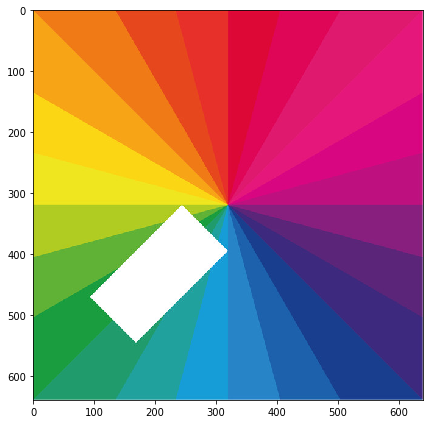

In [2]:
fname = 'album_covers/jamie-xx-in-colour.jpeg'
img = io.imread(fname)
rcParams['figure.figsize'] = 8,6
io.imshow(img)
plt.tight_layout()

In [3]:
type(img)

numpy.ndarray

**(R)** Vemos que `io.imread` devuelve un objeto tipo `numpy.ndarray`.

#### Ejercicio 3

Las dimensiones de la imagen y los canales están dados por:

In [4]:
img.shape

(640, 640, 3)

Redimensionando la imagen:

In [5]:
img = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [6]:
img.shape

(409600, 3)

Ahora inicializamos nuestro algoritmo K-Means con un `k=8`; esto significa que el algoritmo intentará formar 8 grupos (uno por cada color en la carátula) para resolver el problema de K-Means:

In [7]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(img)

También podemos probar con `MiniBatchKMeans`; la diferencia con `KMeans` es que el primero es más rápido, pero puede llevar a resultados distintos:

In [8]:
kmeans_mini = MiniBatchKMeans(n_clusters=8, random_state=42).fit(img)

#### Ejercicio 4

Las etiquetas predichas y sus centroides están dadas por:

In [9]:
labels = kmeans.labels_
labels_mini = kmeans_mini.labels_

In [10]:
clusters = kmeans.cluster_centers_
clusters_mini = kmeans_mini.cluster_centers_

In [11]:
unique, unique_counts = np.unique(labels, return_counts=True)

In [12]:
unique_mini, unique_counts_mini = np.unique(labels_mini, return_counts=True)

#### Ejercicio 5

In [13]:
def rgb_to_hex(rgb):
    tmp = list(map(lambda x: int(x), rgb))
    return '#%02x%02x%02x' % (tmp[0], tmp[1], tmp[2])

In [14]:
hex_kmeans = list(map(lambda x: rgb_to_hex(x), clusters))

In [15]:
hex_kmeans_mini = list(map(lambda x: rgb_to_hex(x), clusters_mini))

In [16]:
pd.DataFrame({'KMeans':hex_kmeans,'MiniBatchKMeans':hex_kmeans_mini})

,KMeans,MiniBatchKMeans
0,#5a257c,#ea561d
1,#e7c61a,#d1116d
2,#2095be,#1f87b9
3,#da0f6b,#fdfefe
4,#fdfefe,#e7c61a
5,#ea561d,#60b236
6,#34a34b,#392f82
7,#1a4c9a,#1d9c55


#### Ejercicio 6

In [17]:
base = pd.concat([pd.Series(hex_kmeans),pd.Series(unique_counts)], axis=1)
base.columns =['hex', 'count']
base['%'] = round(base['count'] / np.sum(base['count']), 2)
base

,hex,count,%
0,#5a257c,51039,0.12
1,#e7c61a,64571,0.16
2,#2095be,40879,0.10
3,#da0f6b,102402,0.25
4,#fdfefe,22800,0.06
5,#ea561d,51080,0.12
6,#34a34b,39470,0.10
7,#1a4c9a,37359,0.09


In [18]:
base_sorted = base.sort_values(by='%', ascending= False)

In [19]:
base_mini = pd.concat([pd.Series(hex_kmeans_mini),pd.Series(unique_counts_mini)], axis=1)
base_mini.columns =['hex', 'count']
base_mini['%'] = round(base_mini['count'] / np.sum(base_mini['count']), 2)
base_mini

,hex,count,%
0,#ea561d,51082,0.12
1,#d1116d,115185,0.28
2,#1f87b9,56445,0.14
3,#fdfefe,22801,0.06
4,#e7c61a,64459,0.16
5,#60b236,13609,0.03
6,#392f82,60000,0.15
7,#1d9c55,26019,0.06


In [20]:
base_sorted_mini = base_mini.sort_values(by='%', ascending= False)

#### Ejercicio 7

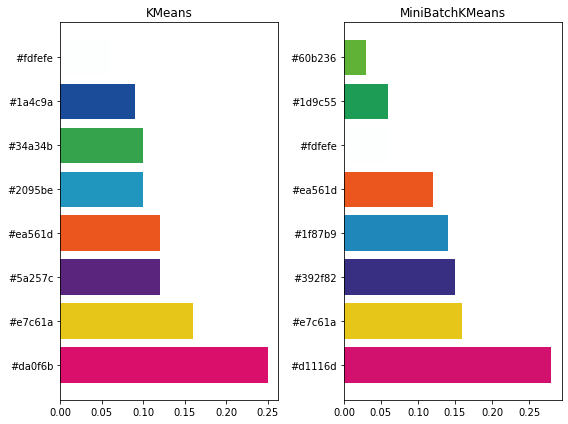

In [21]:
plt.subplot(1,2,1)
plt.title('KMeans')
plt.barh(base_sorted['hex'], base_sorted['%'], color=base_sorted['hex'])
plt.subplot(1,2,2)
plt.title('MiniBatchKMeans')
plt.barh(base_sorted_mini['hex'], base_sorted_mini['%'], color=base_sorted_mini['hex'])
plt.tight_layout()

#### Ejercicio 8

In [22]:
def plot_principal_colors(filename, n_colors, random_seed=42):
    """Plots main groups of colors from input image using KMeans."""
    image = io.imread(filename)
    image = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
    model_kmeans = KMeans(n_clusters=n_colors, random_state=random_seed).fit(image)
    model_kmeans_mini = MiniBatchKMeans(n_clusters=n_colors, random_state=random_seed).fit(image)
    colors = model_kmeans.cluster_centers_
    colors_mini = model_kmeans_mini.cluster_centers_
    unique_labels, unique_labels_counts = np.unique(model_kmeans.labels_, return_counts=True)
    unique_labels_mini, unique_labels_counts_mini = np.unique(model_kmeans_mini.labels_, return_counts=True)
    hex_colors = list(map(lambda x: rgb_to_hex(x), colors))
    hex_colors_mini = list(map(lambda x: rgb_to_hex(x), colors_mini))
    results = pd.concat([pd.Series(hex_colors),pd.Series(unique_labels_counts)], axis=1)
    results.columns =['hex', 'count']
    results['%'] = round(results['count'] / np.sum(results['count']), 2)
    results_mini = pd.concat([pd.Series(hex_colors_mini),pd.Series(unique_labels_counts_mini)], axis=1)
    results_mini.columns =['hex', 'count']
    results_mini['%'] = round(results_mini['count'] / np.sum(results_mini['count']), 2)
    results_sorted = results.sort_values(by='%', ascending= False)
    results_sorted_mini = results_mini.sort_values(by='%', ascending= False)
    rcParams['figure.figsize'] = 14,6
    plt.subplot(1,3,1)
    plt.title('Image')
    io.imshow(io.imread(filename))
    plt.subplot(1,3,2)
    plt.title('KMeans')
    plt.barh(results_sorted['hex'], results_sorted['%'], color=results_sorted['hex'])
    plt.subplot(1,3,3)
    plt.title('MiniBatchKMeans')
    plt.barh(results_sorted_mini['hex'], results_sorted_mini['%'], color=results_sorted_mini['hex'])
    plt.tight_layout()

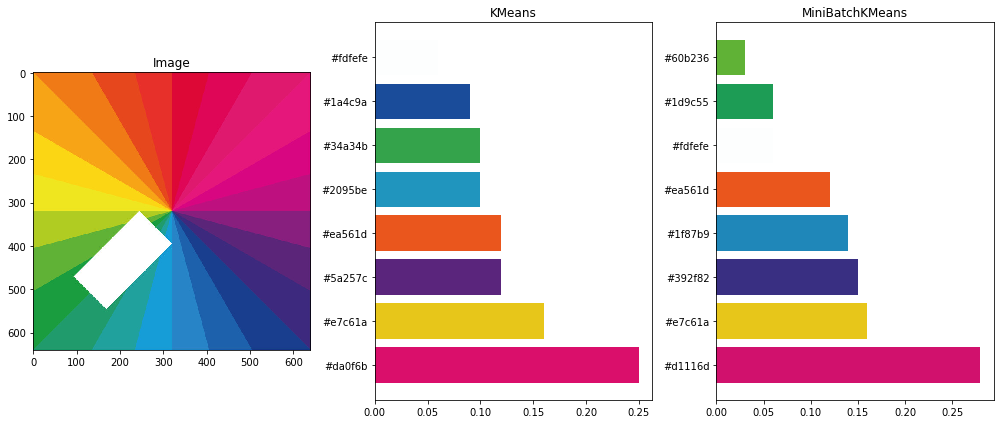

In [23]:
plot_principal_colors(filename=fname, n_colors=8)

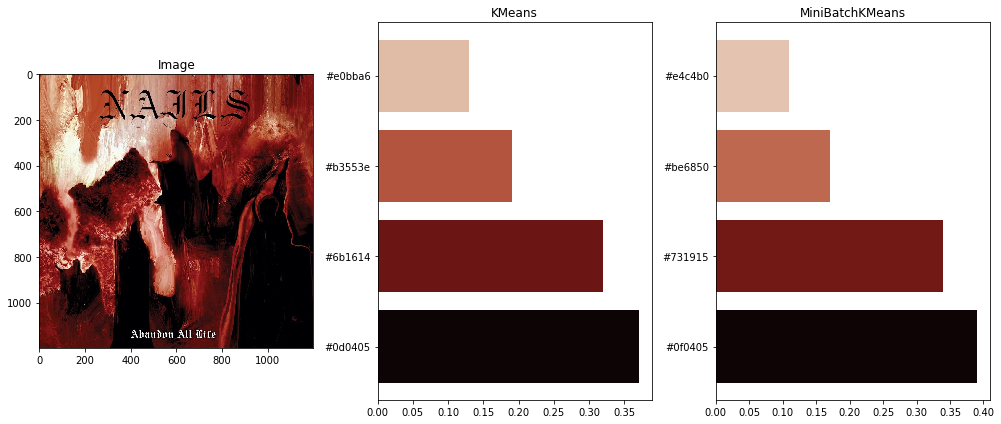

In [24]:
plot_principal_colors(filename='album_covers/nails-abandon-all-life.jpg', n_colors=4)

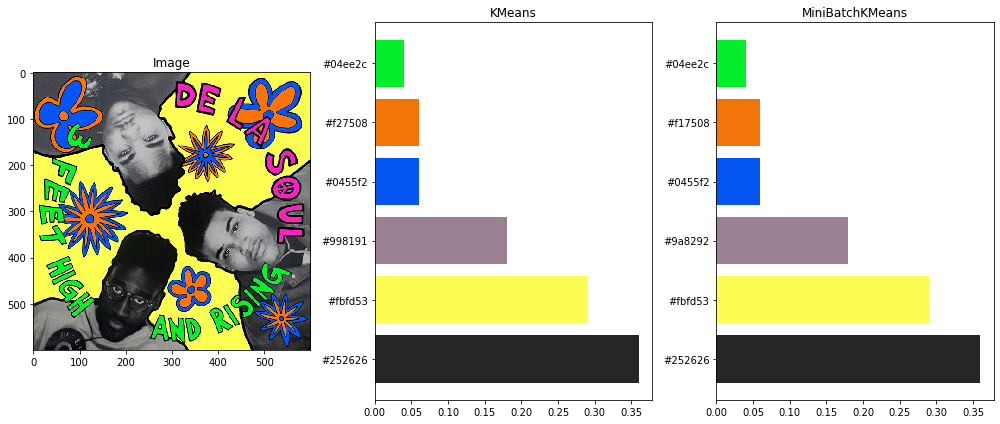

In [25]:
plot_principal_colors(filename='album_covers/de-la-soul-3-feets-and-rising.jpg', n_colors=6)